#### Use case 2 - Predicting topics of Hotel Reviews

In [1]:
# latent semantic analysis is a name given to the process of doing an SVD on sparse text document-term matricies
# It is done to find latent structure in text for the purposes of classification, clustering, etc

In [2]:
# Ace included this to download nltk packages
# import the sentence tokenizer from nltk
# One time activity to use nltk

# import nltk
# nltk.download()

In [31]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
import pandas as pd

from nltk.tokenize import sent_tokenize
from sklearn.decomposition import TruncatedSVD
from functools import reduce
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [4]:
hotel_reviews = pd.read_csv('Data/7282_1.csv')

In [5]:
hotel_reviews.shape

(35912, 19)

In [6]:
hotel_reviews.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [7]:
# Let's only include reviews from the US to try to only include english reviews

# plot the lats and longs of reviews
hotel_reviews.plot.scatter(x='longitude', y='latitude')

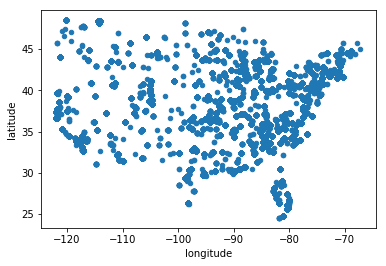

In [8]:
#Filter to only include datapoints within the US
hotel_reviews = hotel_reviews[((hotel_reviews['latitude']<=50.0) & (hotel_reviews['latitude']>=24.0)) & ((hotel_reviews['longitude']<=-65.0) & (hotel_reviews['longitude']>=-122.0))]

# Plot the lats and longs again
hotel_reviews.plot.scatter(x='longitude', y='latitude')
# Only looking at reviews that are coming from the US

In [9]:
hotel_reviews.shape

(30692, 19)

In [10]:
texts = hotel_reviews['reviews.text']

In [11]:
sent_tokenize("hello! I am Sinan. How are you??? I am fine")

['hello!', 'I am Sinan.', 'How are you???', 'I am fine']

In [18]:
sentences = reduce(lambda x, y:x+y, texts.apply(lambda x: sent_tokenize(str(x))))

In [19]:
# the number of sentences
len(sentences)

118151

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

tfidf_transformed = tfidf.fit_transform(sentences)

tfidf_transformed

<118151x280901 sparse matrix of type '<class 'numpy.float64'>'
	with 1180273 stored elements in Compressed Sparse Row format>

In [23]:
# try to fit PCA

PCA(n_components=1000).fit(tfidf_transformed)

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [24]:
# import the Iris dataset from scikit-learn
from sklearn.datasets import load_iris
# import our plotting module
import matplotlib.pyplot as plt
%matplotlib inline

# load the Iris dataset
iris = load_iris()

# seperate the features and response variable
iris_X, iris_y = iris.data, iris.target

X_centered = StandardScaler(with_std=False).fit_transform(iris_X)
X_scaled = StandardScaler().fit_transform(iris_X)

NameError: name 'StandardScaler' is not defined

In [25]:
# can't work because it has to calculate a covariance matrix and to do that, the matrix needs to be dense
# we use another method in sklearn called Truncated SVD
# Truncated SVD uses a matrix trick to obtain the same components as PCA (when the data are scaled)
# and can work with sparse matrices

# components are a not exactly equal but they are up to a very precise decimal

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
pca = PCA(n_components=2)

# check if components of PCA and TruncatedSVD are same for a dataset
# by substracting the two matricies and seeing if, on average, the elements are very close to 0
print (pca.fit(iris_X).components_ - svd.fit(iris_X).components_).mean()  # not close to 0
# matrices are NOT the same

# check if components of PCA and TruncatedSVD are same for a centered dataset
print (pca.fit(X_centered).components_ - svd.fit(X_centered).components_).mean()  # close to 0
# matrices ARE the same

# check if components of PCA and TruncatedSVD are same for a scaled dataset
print (pca.fit(X_scaled).components_ - svd.fit(X_scaled).components_).mean()  # close to 0
# matrices ARE the same


[[-0.38972157 -0.46460869  0.34366175  0.19038166]
 [ 0.37241387  0.18341693  0.53529189  0.26818979]]


AttributeError: 'NoneType' object has no attribute 'mean'

In [26]:
svd = TruncatedSVD(n_components=1000)
svd.fit(tfidf_transformed)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
       random_state=None, tol=0.0)

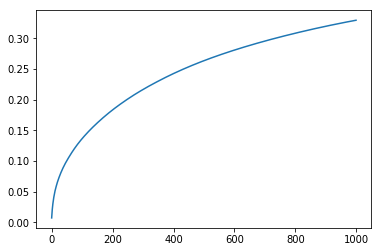

In [29]:
# Scree Plot

plt.plot(np.cumsum(svd.explained_variance_ratio_))

# 1,000 components captures about 30% of the variance

In [32]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
svd = TruncatedSVD(n_components=10)  # will extract 10 "topics"
normalizer = Normalizer() # will give each document a unit norm

lsa = Pipeline(steps=[('tfidf', tfidf), ('svd', svd), ('normalizer', normalizer)])

In [33]:
lsa_sentences = lsa.fit_transform(sentences)

lsa_sentences.shape

(118151, 10)

In [34]:
cluster = KMeans(n_clusters=10)

cluster.fit(lsa_sentences)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
%%timeit
# time it takes to cluster on the original document-term matrix of shape (118151, 280901)
cluster.fit(tfidf_transformed)

In [ ]:
%%timeit
# also time the prediction phase of the Kmeans clustering
cluster.predict(tfidf_transformed)

In [ ]:
%%timeit
# time the time to cluster after latent semantic analysis of shape (118151, 10)
cluster.fit(lsa_sentences)
# over 80 times faster than fitting on the original tfidf dataset

In [ ]:
%%timeit
# also time the prediction phase of the Kmeans clustering after LSA was performed
cluster.predict(lsa_sentences)
# over 4 times faster than predicting on the original tfidf dataset

In [ ]:
# transform texts to a cluster distance space
# each row represents an obsercation
cluster.transform(lsa_sentences).shape

In [ ]:
predicted_cluster = cluster.predict(lsa_sentences)
predicted_cluster

In [ ]:
# Distribution of "topics"
pd.Series(predicted_cluster).value_counts(normalize=True)# create DataFrame of texts and predicted topics
texts_df = pd.DataFrame({'text':sentences, 'topic':predicted_cluster})

texts_df.head()

print "Top terms per cluster:"
original_space_centroids = svd.inverse_transform(cluster.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = lsa.steps[0][1].get_feature_names()
for i in range(10):
    print "Cluster %d:" % i
    print ', '.join([terms[ind] for ind in order_centroids[i, :5]])
    print 

lsa.steps[0][1]

In [ ]:
# topic prediction 
print cluster.predict(lsa.transform(['I definitely recommend this hotel']))

print cluster.predict(lsa.transform(['super friendly staff. Love it!']))